In [1]:
from Code.gan import VanillaTrainTogether_MNIST

In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
#from model import discriminator, generator
import numpy as np
import matplotlib.pyplot as plt

# Define model Generator and Discriminator

In [3]:
# -*- coding: utf-8 -*-
import torch.nn as nn


class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)



# Set up hyper param

In [4]:
G = generator()
D = discriminator()

batch_size = 64
lr = 0.0002
goptim = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
doptim = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                lambda x:x.flatten()])
# Load data
train_set = datasets.MNIST('mnist/', train=True, download=True, transform=transform)
test_set = datasets.MNIST('mnist/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


train = VanillaTrainTogether_MNIST(
    epochs          = 100,
    goptim          =goptim,
    doptim          =doptim,
    generator       = G, 
    discriminator   = D, 
    dataloader      = train_loader,
    latentdim         = (128,)
)

epoch: 5


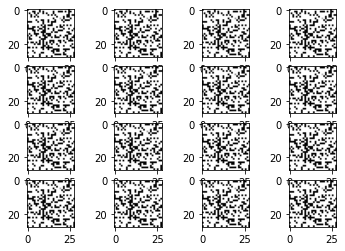

epoch: 10


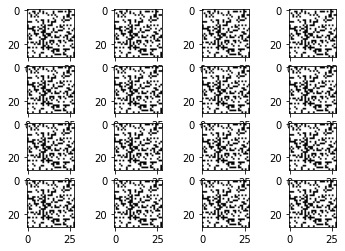

In [5]:
train.train()

In [ ]:
#start_time = time.time()
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
fake_images = G(torch.distributions.Normal(0,1).sample(torch.Size([16,128])).to(train.device)).cpu().detach().numpy()
show_images(fake_images)

In [ ]:
for i,(batch_d,batch_y) in enumerate(train_loader):
    print(batch_d.shape)
    break